In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('other_obs/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886111001PNS003SRSPEC0005.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.280e-03 +/- 6.499e-04 (71.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.775e+04 sec
 Using fit statistic: chi
 Using Background File                P0886111001PNS003BGSPEC0005.FTZ
  Background Exposure Time: 1.775e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886111001PNS003SRCARF0005.FTZ



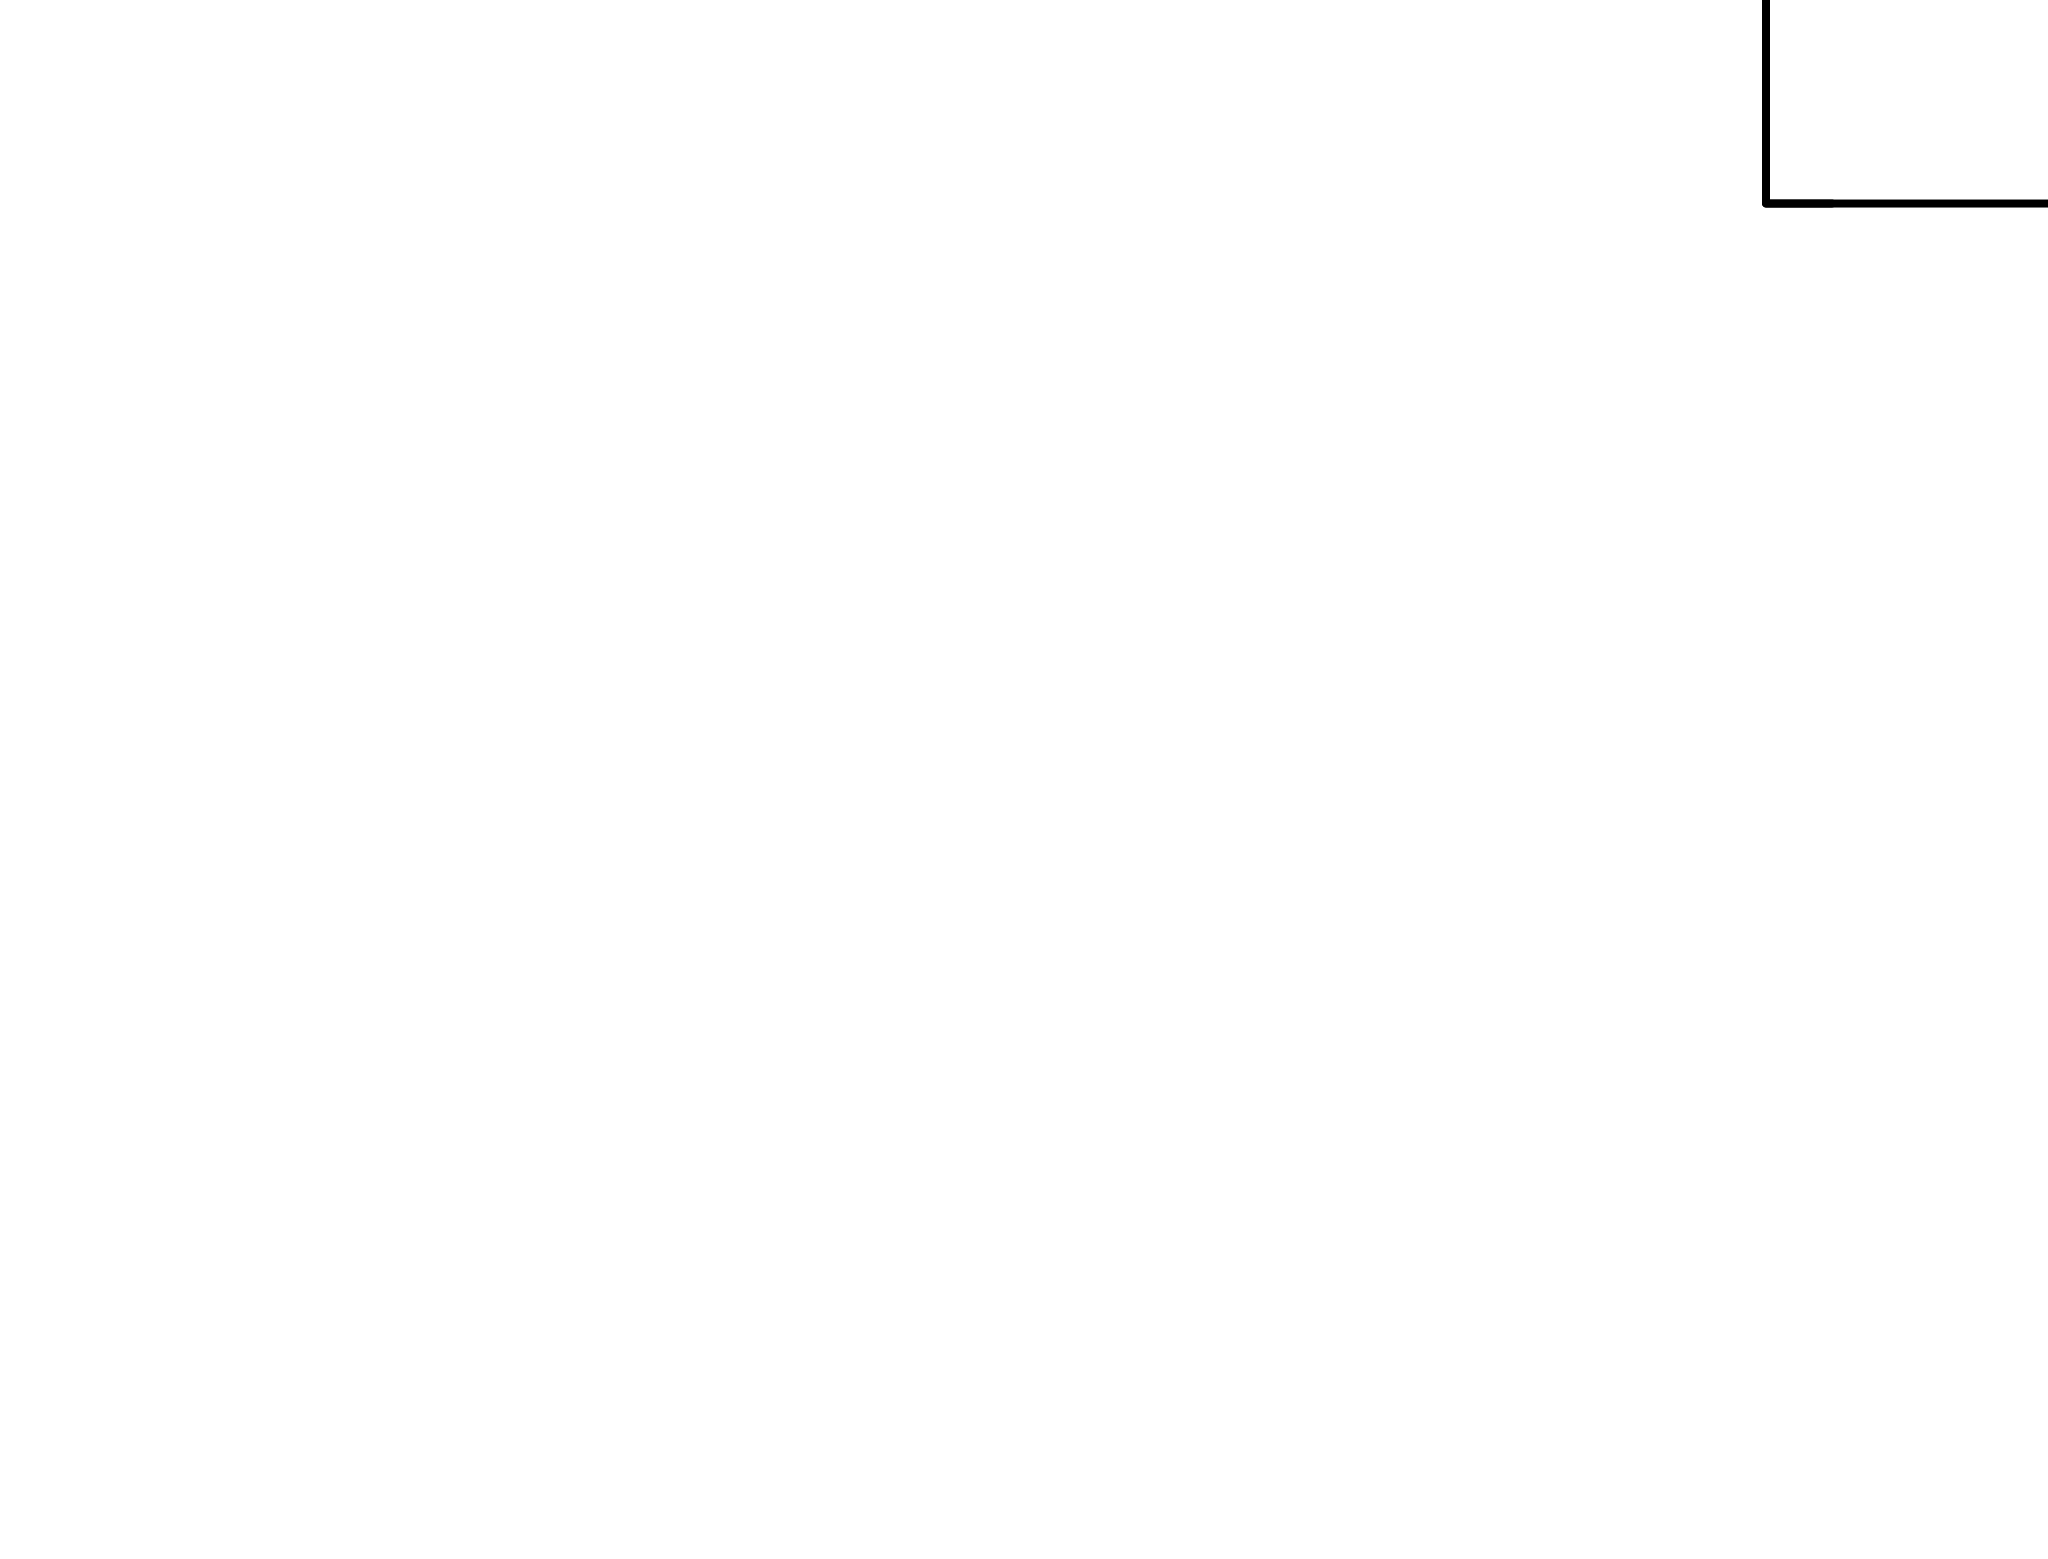

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.036146e+12     using 6 bins.

Tes

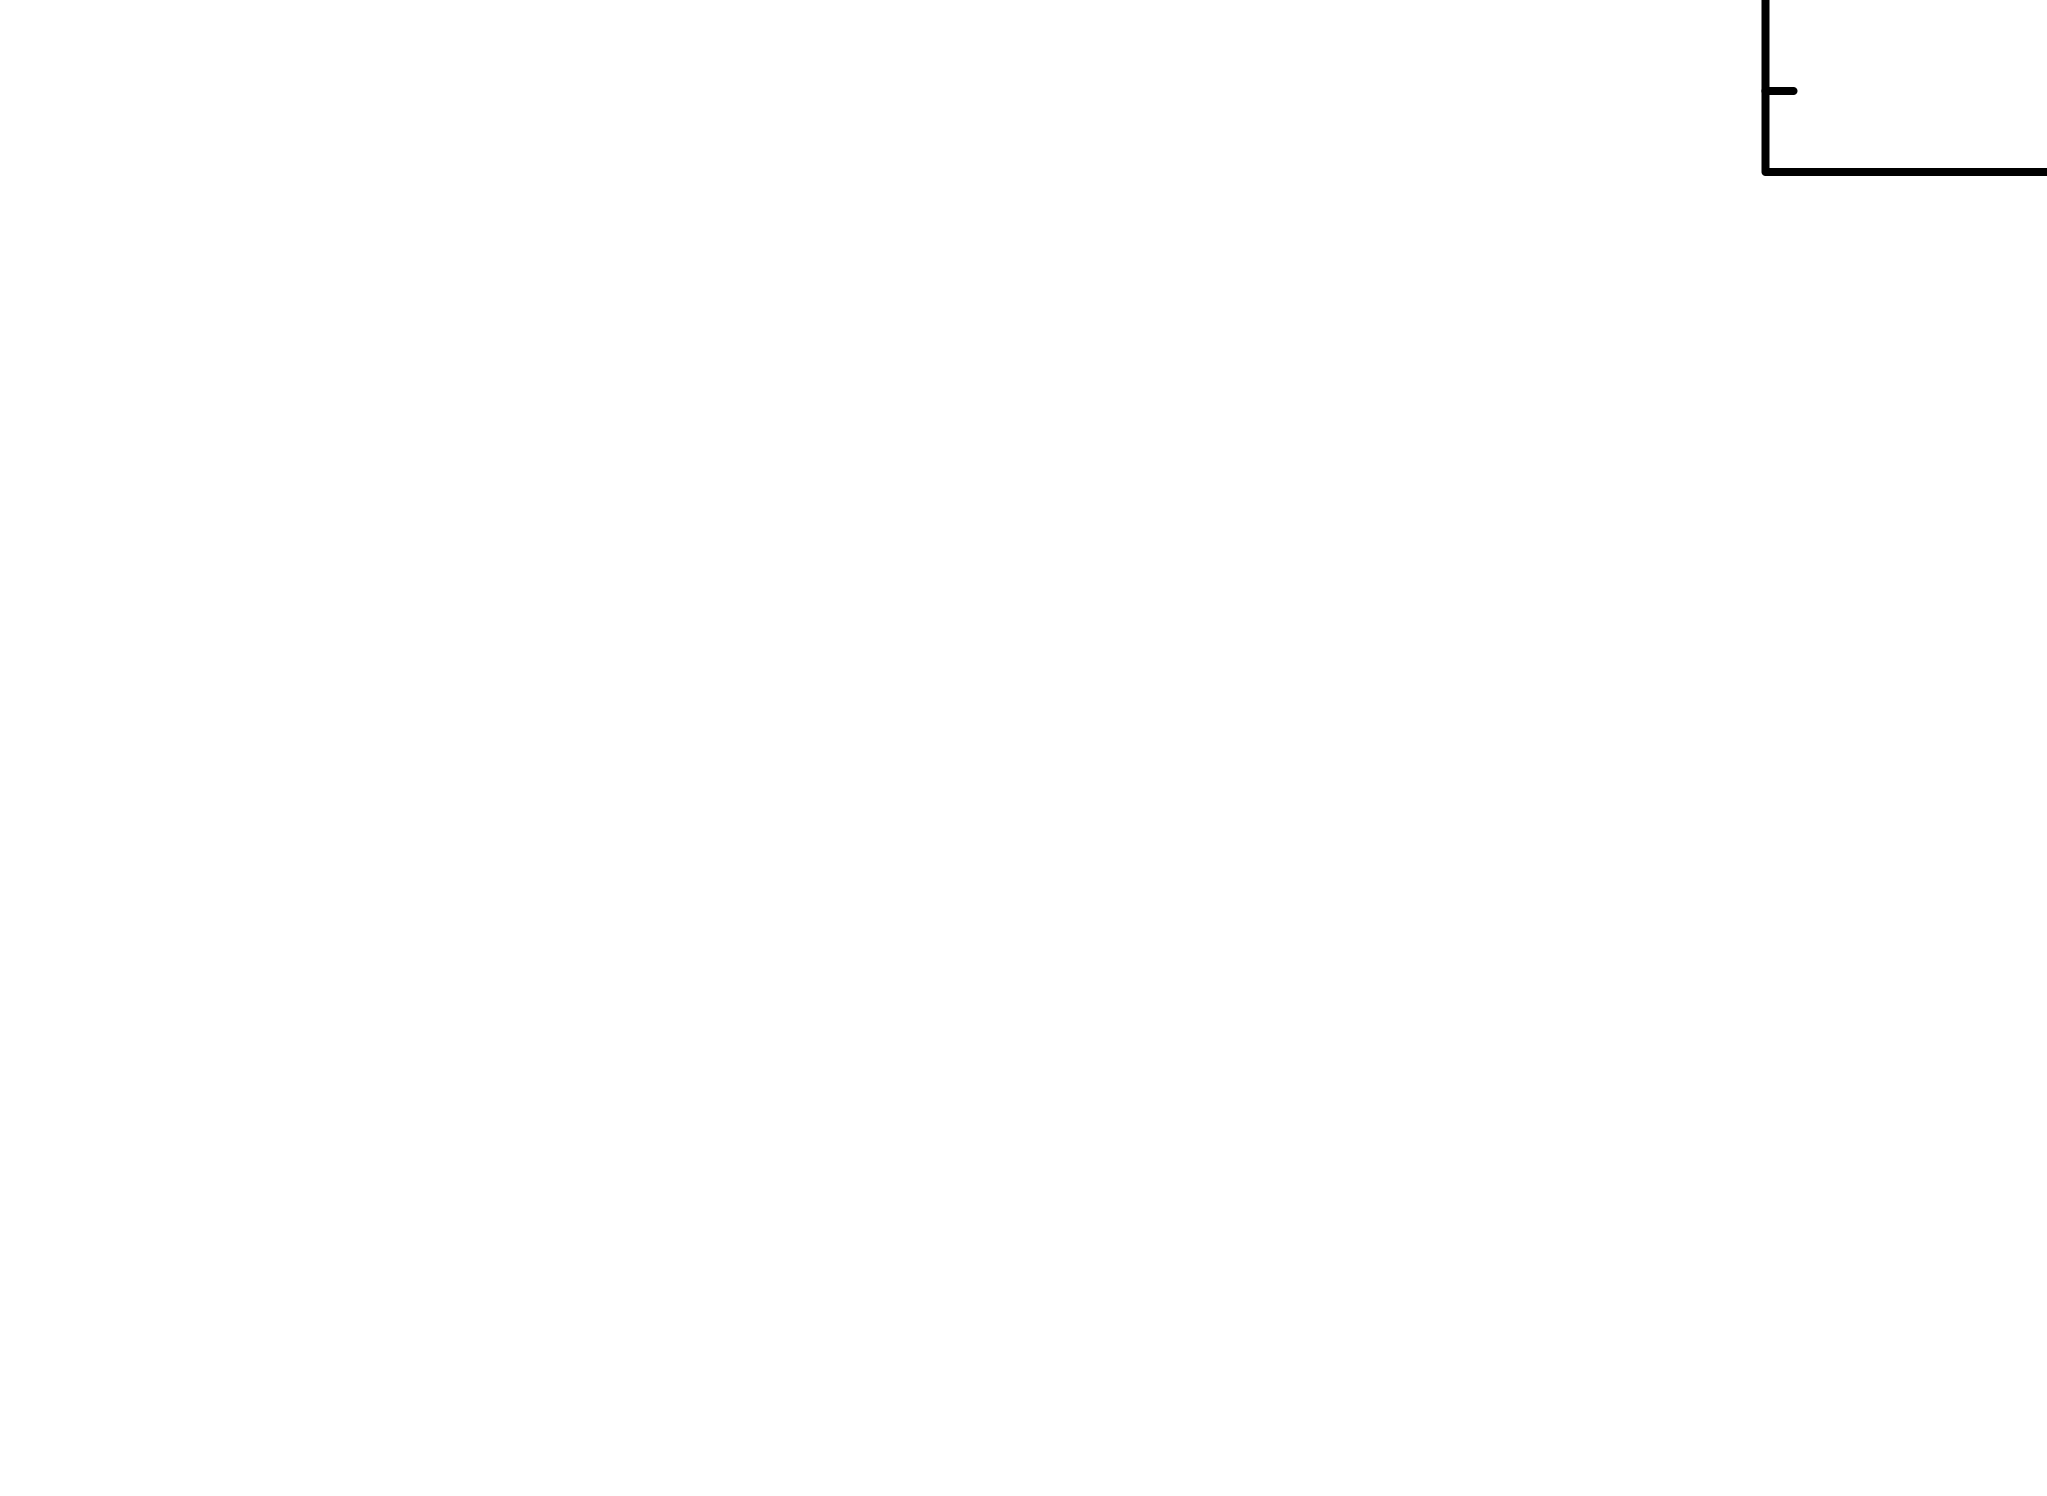

In [3]:
#spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.292745e+11     using 6 bins.

Test statistic : Chi-Squared              6.292745e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
0.859603     1.37635      -3      0.331235      0.801928   6.13783e-06
0.206772     272799       -4      0.394471      0.779930   6.72590e-06
0.203151     4091.55      -5      0.410858      0.797681   6.89645e-06
0

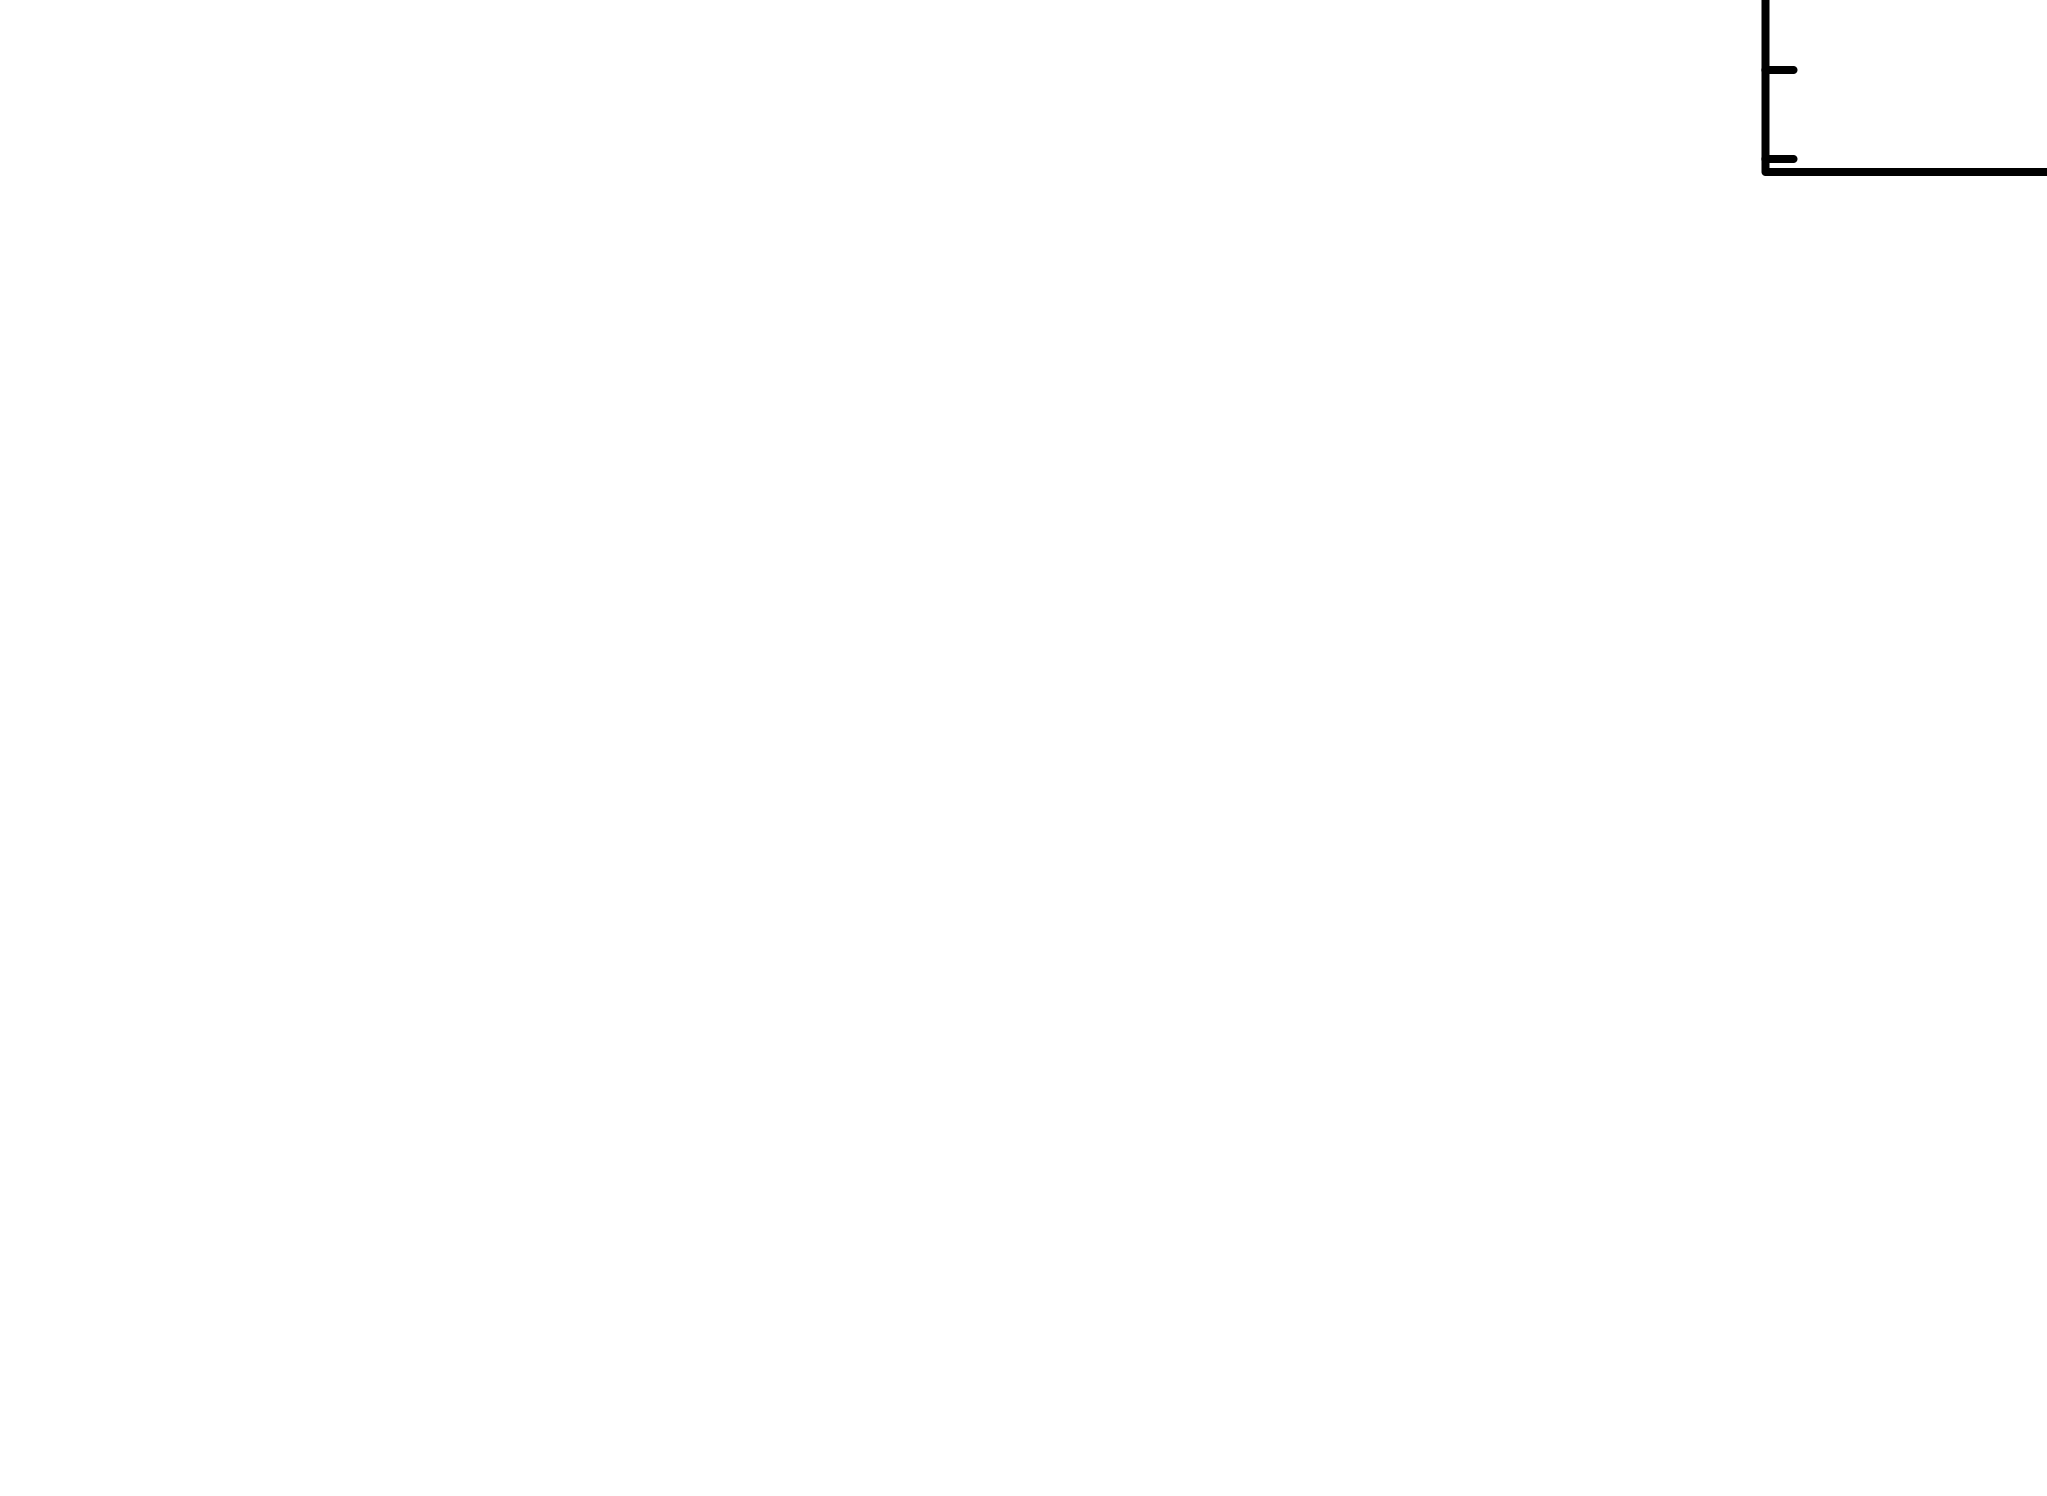

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

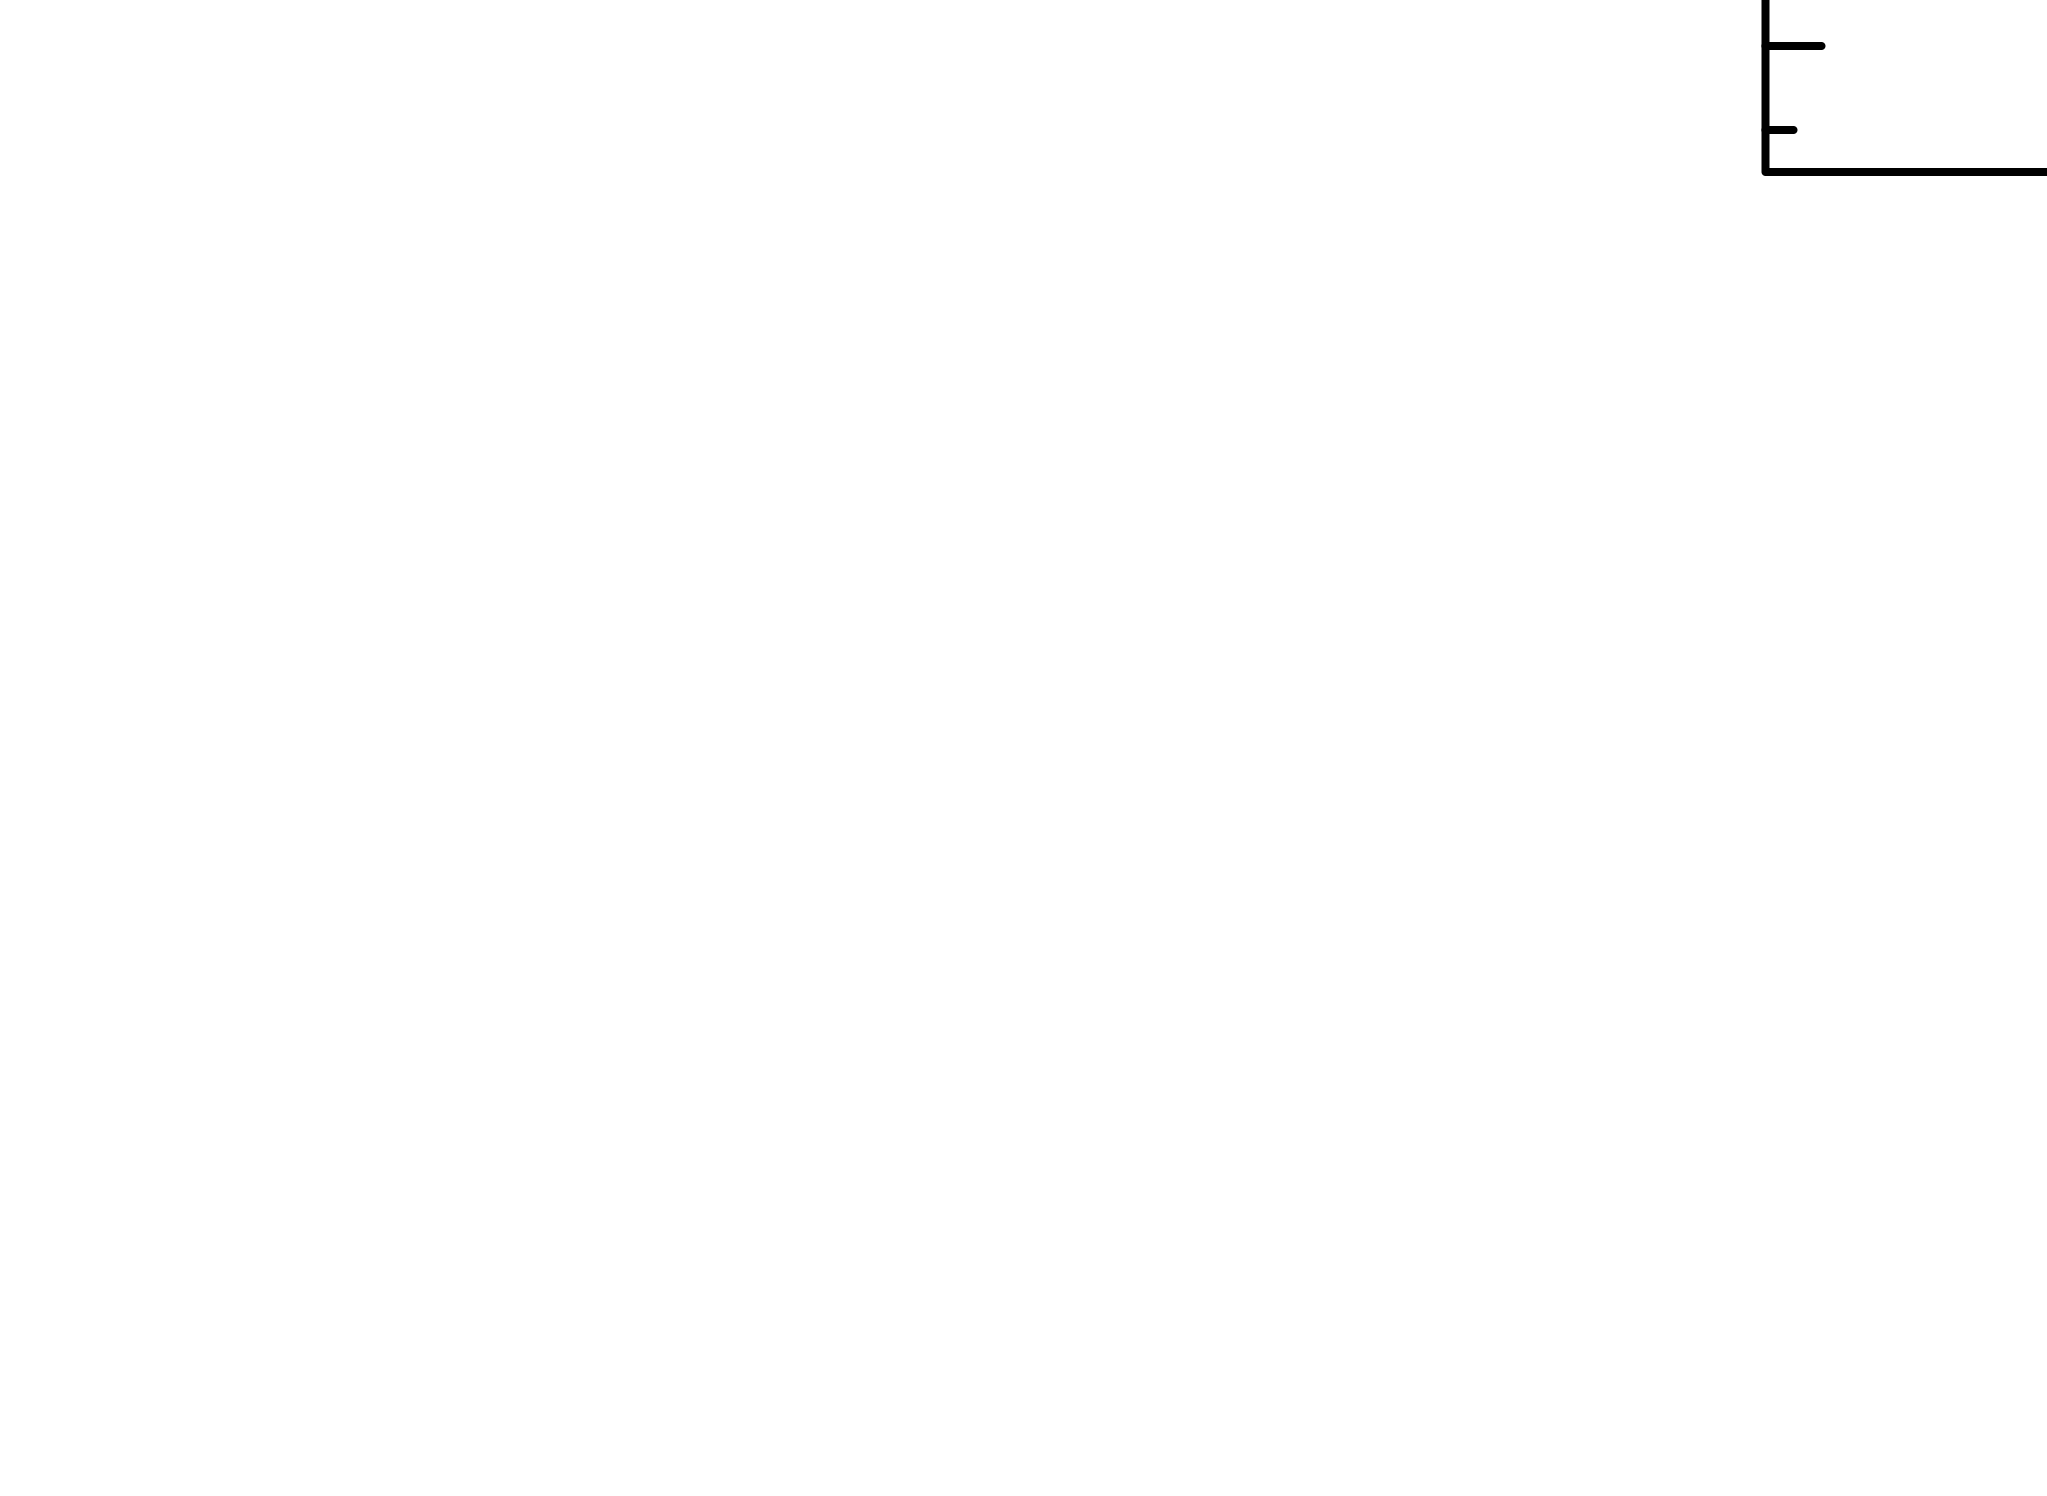


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.022850e+11     using 6 bins.

Test statistic : Chi-Squared              1.022850e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.03134      0.917709     -1      0.904158       15.4412   1.91882e-05
4.96068      181481       -2      0.424672       65.7151   2.15279e-05
4.77837      49105        -2      0.523917       199.025   3.96298e-05
2.3

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

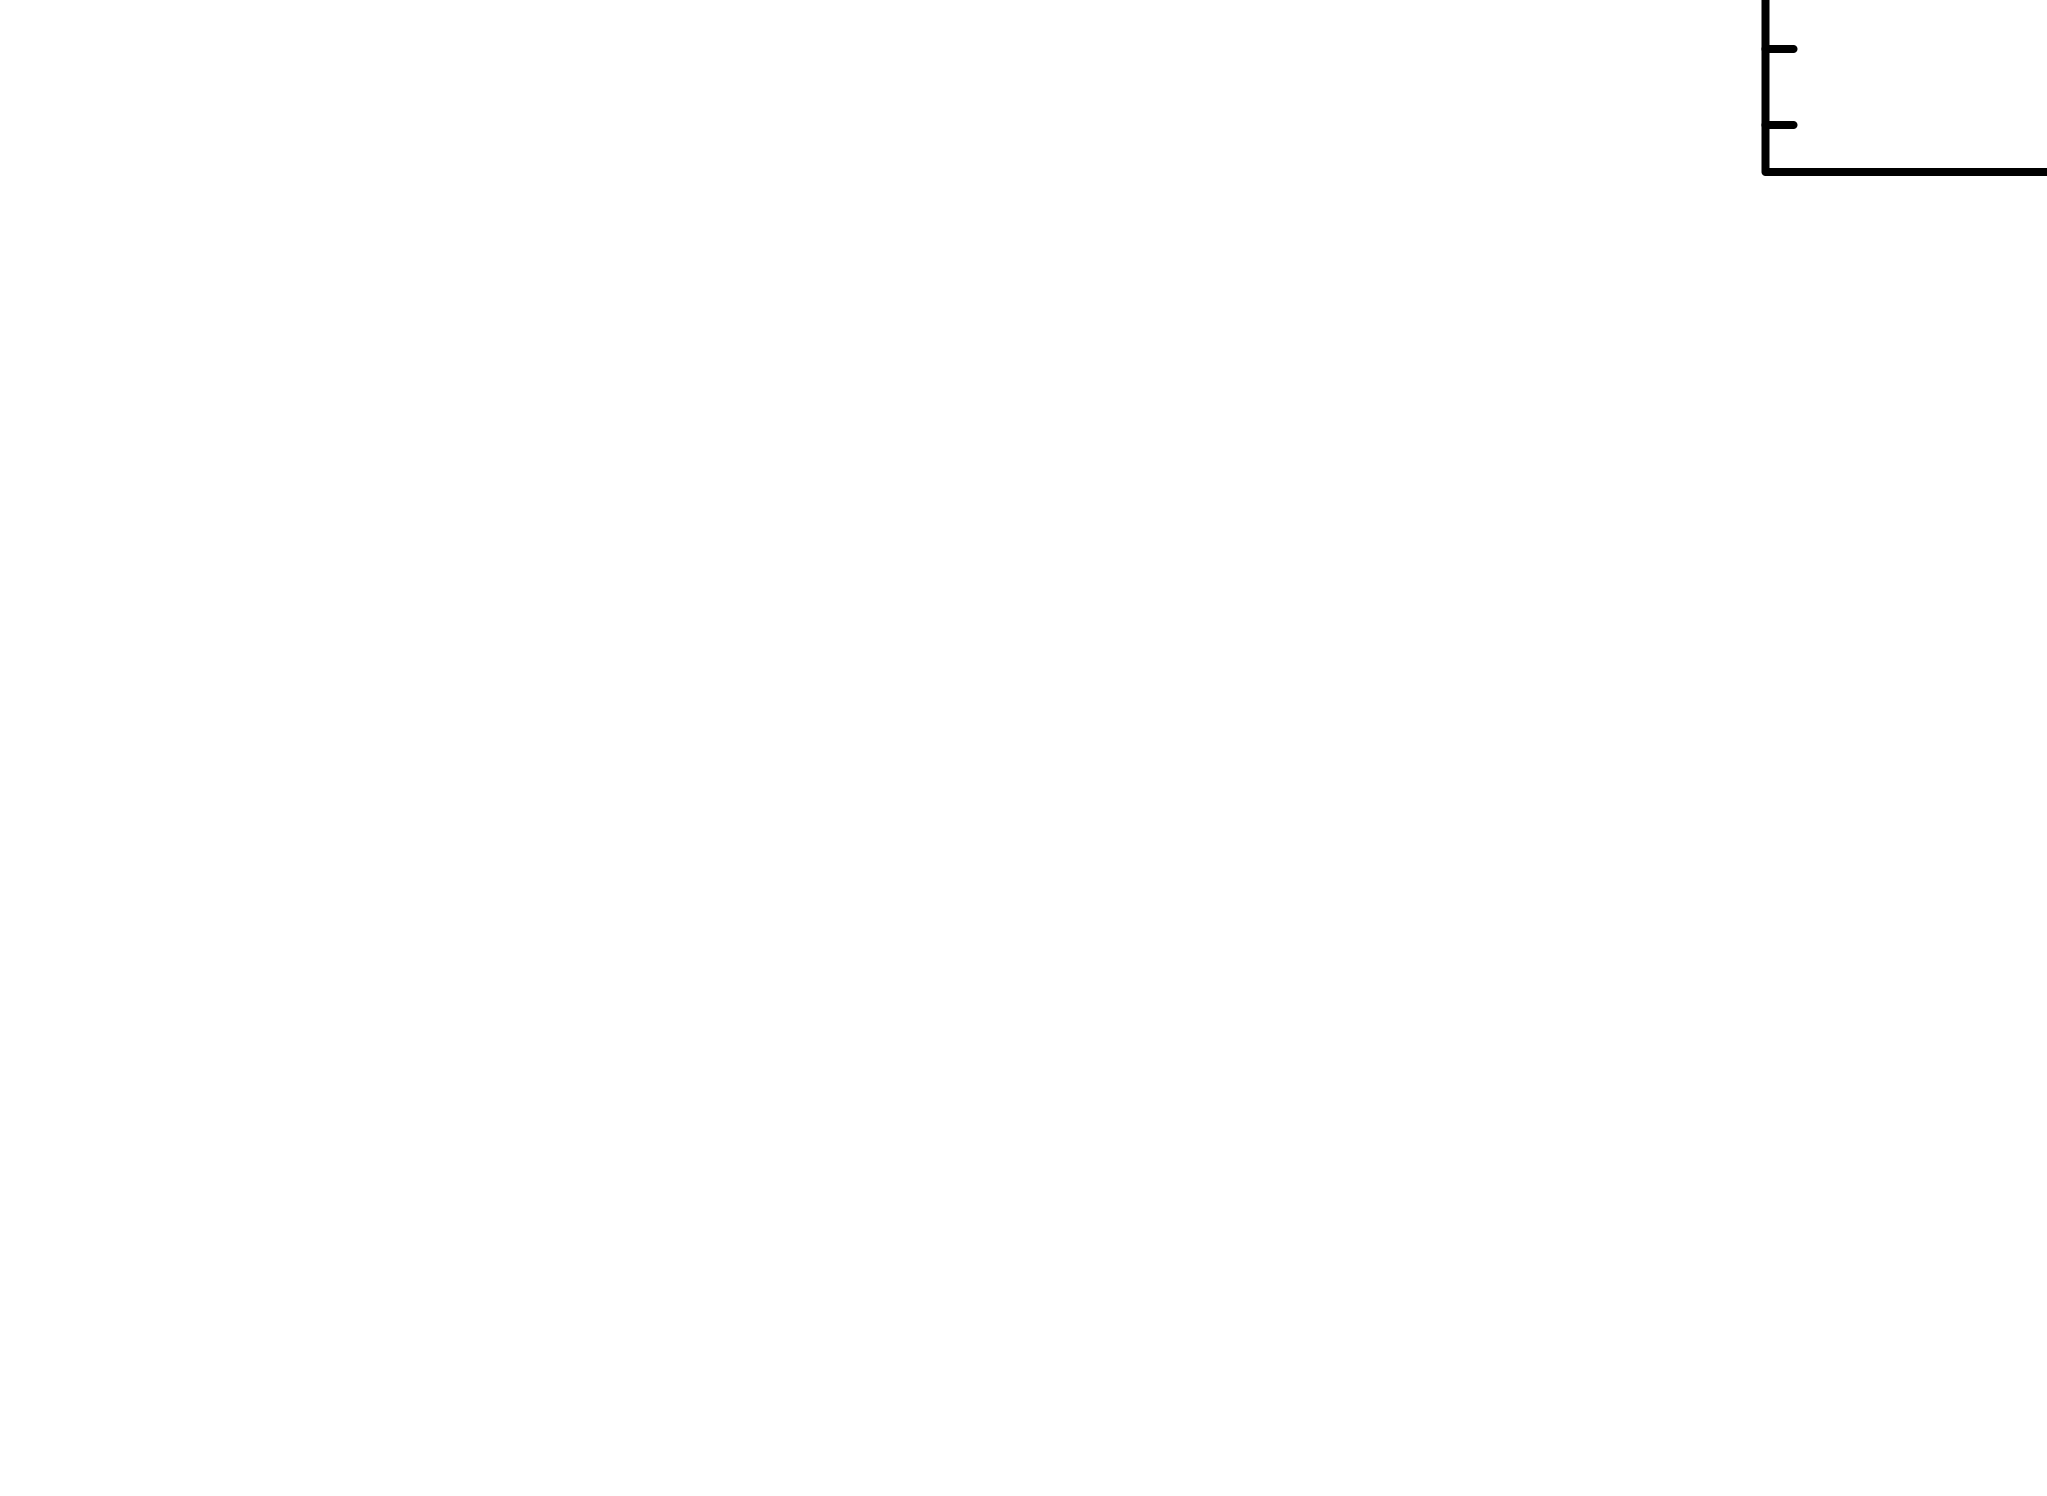


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.359940e+10     using 6 bins.

Test statistic : Chi-Squared              2.359940e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
30.6914      5.29956      -3       1.32741       1.36810   5.1

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.8127e-05 photons (1.3238e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 0.2883
d_kpc = 1/plx
F_x = 1.6616*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.391215304225363e+32


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

3.46860908775581
32.37861868160606


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*17.90)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  7.264225194648832e-13
F_x / F_opt:  -0.6406628155428953
